# Predicting heart-disease using ML

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## 1 Problem Defination
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

# 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

# 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

# 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

1) age - age in years

2) sex - (1 = male; 0 = female)

3) cp - chest pain type
 * 0: Typical angina: chest pain related decrease blood supply to the heart
 * 1: Atypical angina: chest pain not related to heart
 * 2: Non-anginal pain: typically esophageal spasms (non heart related)

What is angina ??:a type of chest pain caused by reduced blood flow to the heart.

 * 3: Asymptomatic: chest pain not showing signs of disease

4) trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5) chol - serum cholestoral in mg/dl
 * serum = LDL + HDL + .2 * triglycerides
 * above 200 is cause for concer


6) fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
  * '>126' mg/dL signals diabetes
  
7) restecg - resting electrocardiographic results
 * 0: Nothing to note
 * 1: ST-T Wave abnormality
  * can range from mild symptoms to severe problems
  * signals non-normal heart beat
 * 2: Possible or definite left ventricular hypertrophy
  * Enlarged heart's main pumping chamber
  
8) thalach - maximum heart rate achieved

9) exang - exercise induced angina (1 = yes; 0 = no)

10) oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11) slope - the slope of the peak exercise ST segment

 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart

12) ca - number of major vessels (0-3) colored by flourosopy
  * colored vessel means the doctor can see the blood passing through
  * the more blood movement the better (no clots)

13) thal - thalium stress result
  * 1,3: normal
  * 6: fixed defect: used to be defect but ok now
  * 7: reversable defect: no proper blood movement when excercising

14) target - have disease or not (1=yes, 0=no) (= the predicted attribute)




# Preparing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation.

In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# LOAding the data

In [2]:
#/content/heart.csv
df = pd.read_csv("/content/heart.csv")
df.shape # (rows, columns)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

* 1) What question(s) are you trying to solve?
* 2) What kind of data do we have and how do we treat different types?
* 3) What's missing from the data and how do you deal with it?
* 4) Where are the outliers and why should you care about them?
* 5) How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.isna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

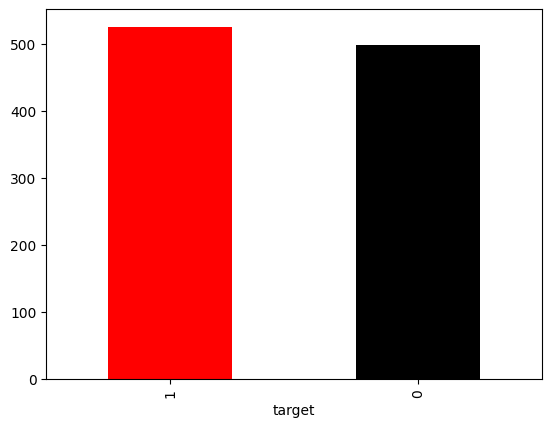

In [7]:
df["target"].value_counts().plot(kind="bar", color=["RED", "black"]);

In [8]:
# Different information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
# more info about our dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [11]:
# we want to compare sex attribute to target attribute
df.sex.value_counts()
print("1: MALE :",df.sex.value_counts()[1]) # 1 stands for male from sex column
print("0: FEMALE:", df.sex.value_counts()[0])

1: MALE : 713
0: FEMALE: 312


In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)
#this indicates that majority of female is having heart problems in this particular dataset,
#where in male the gap between males having heart disease and not having is v less


sex,0,1
target,,
0,86,413
1,226,300


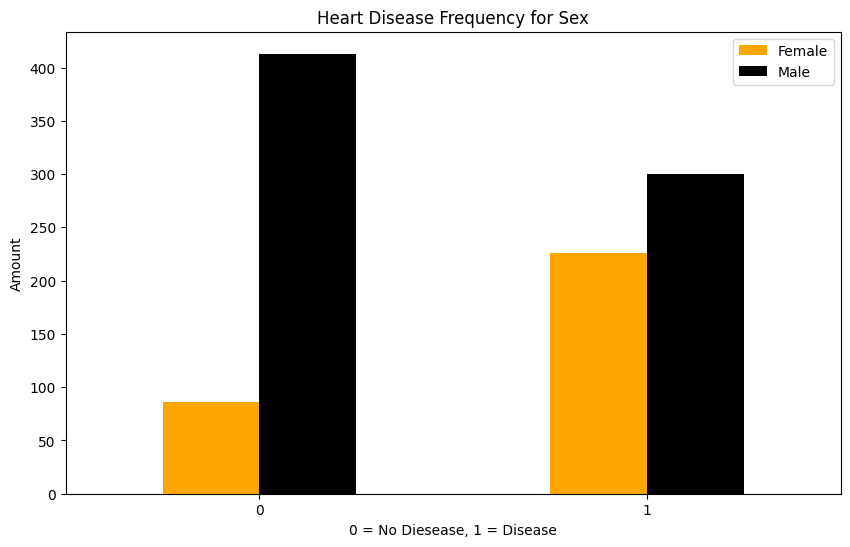

In [13]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["Orange", "Black"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
#xticks is just to label 0 and 1 in the x-axis with rotation=0 which indicates that labels are vertical
plt.xticks(rotation=0);

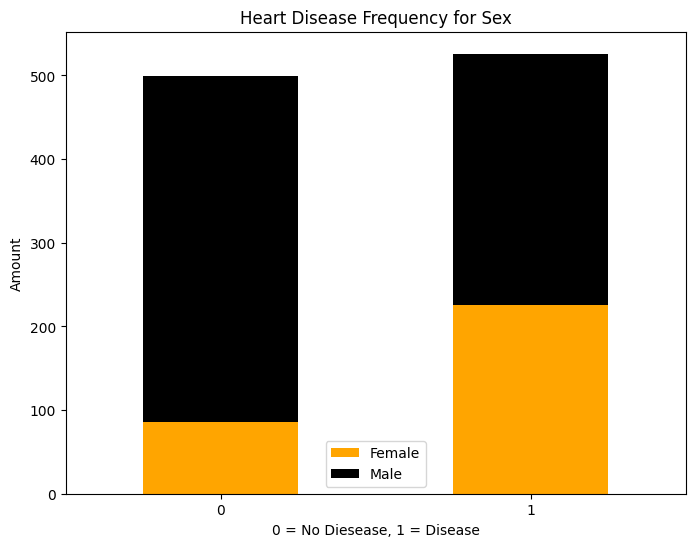

In [14]:
# different way to plot above graph
df2_sex_target =pd.crosstab(df.target,df.sex)
df2_sex_target.plot.bar(stacked =True,figsize=(8,6),color =("Orange","Black"));
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
#xticks is just to label 0 and 1 in the x-axis with rotation=0 which indicates that labels are vertical
plt.xticks(rotation=0);

## Avg vs Max Heart Rate for Heart Disease

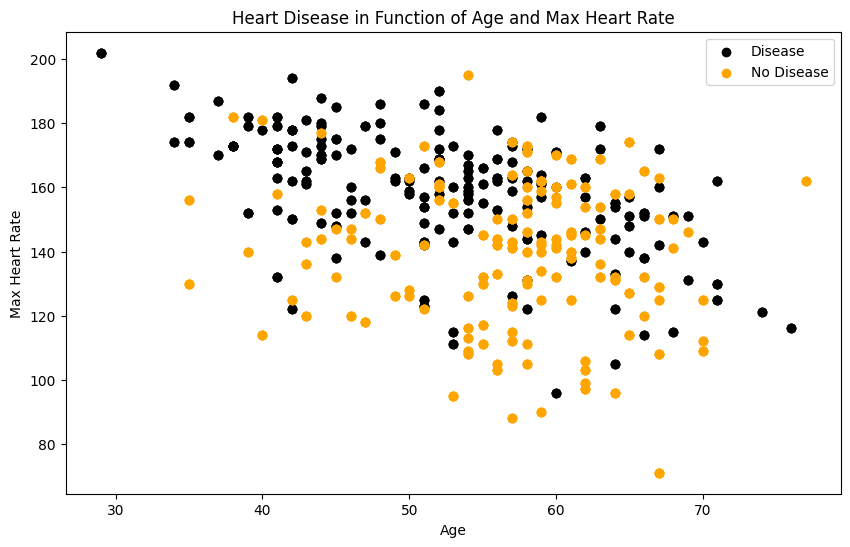

In [15]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1], #here we r taking a age col where target==1
            df.thalach[df.target==1], #similar to above we taking thalach where target ==1
            c="Black")

# Scatter with negative examples
plt.scatter(df.age[df.target==0], # here we r taking age where targe == 0 (negative report)
            df.thalach[df.target==0],# here we r taking thalach where targe == 0 (negative report)
            c="Orange")

# Add some helpful info onto graph
plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

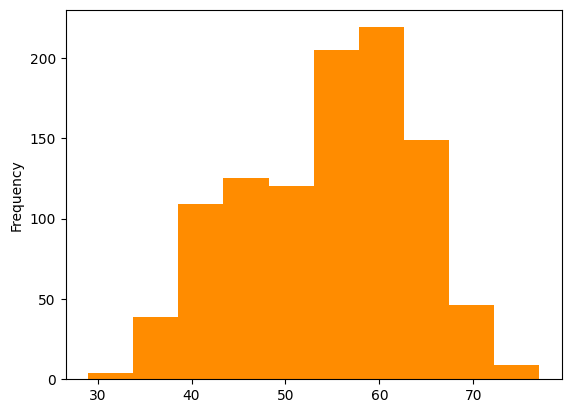

In [16]:
# Check the distribution of the age col with histogram
df.age.plot.hist(color="DarkOrange");
## APPROX: # the graph concludes that mojority of our data is in the age gap of 50-65 age grp


## Heart Disease Frequency per Chest Pain Type
**cp - chest pain type**

* 0: Typical angina: chest pain related decrease blood supply to the heart**
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,375,33,65,26
1,122,134,219,51


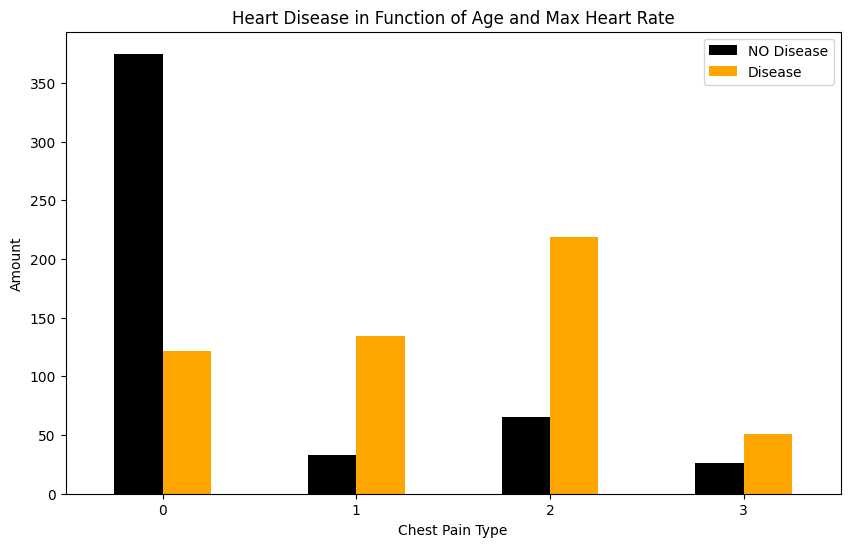

In [18]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["Black","Orange"])
# Add some helpful info onto graph
plt.title("Heart Disease in Function of Age and Max Heart Rate")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NO Disease", "Disease"]);
plt.xticks(rotation =0);

In [19]:
## Making a Correlation matrix
## it says that how independent variables/values are related to each other
df.corr()
#know more about Correlation matrix ??

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


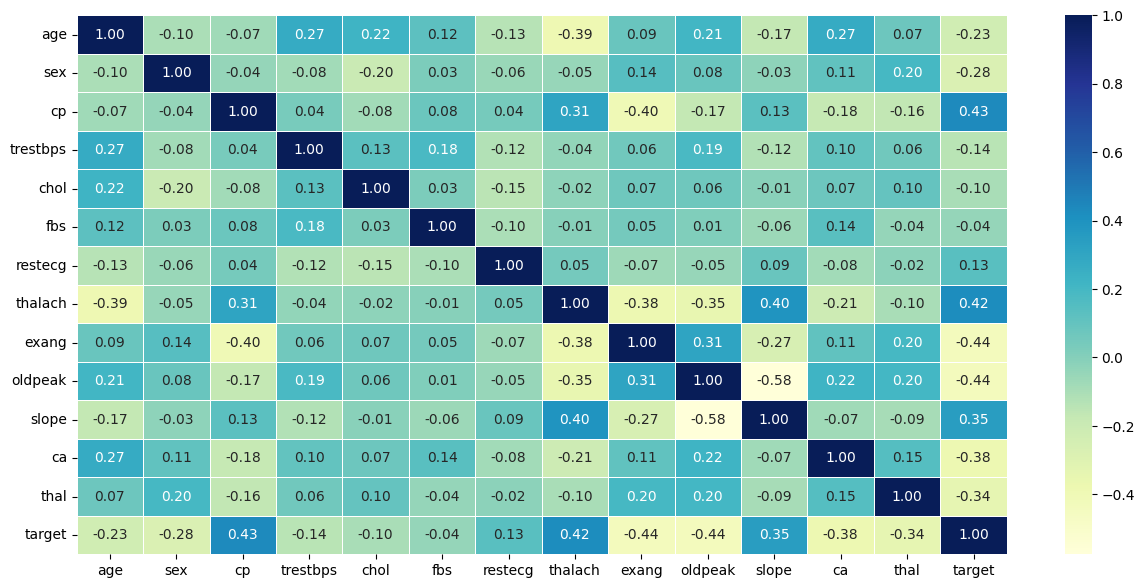

In [20]:
# make it more visual
#using seaborns heatmaps
corr_mat=df.corr()
fig,ax= plt.subplots(figsize=(15,7))
ax= sns.heatmap(corr_mat,annot=True,
               linewidths=0.5,
                fmt=".2f",
               cmap="YlGnBu"
               #center=1
               )#PiYG,BuPu

#Negative correlation : a relationship between two variables in which one variable increases as the other decreases

So the correlation matrix does says a lot about how individual column is related to the other columns in a positive way or negative way.
like for eg when you see last column of target you will witness **CP** ie chest pain,**Thalach** and  **slope** is something whoes values in positive is more compare to others which indicates that this columns are having positive impact on the target columns and wise versa for the -ve columns

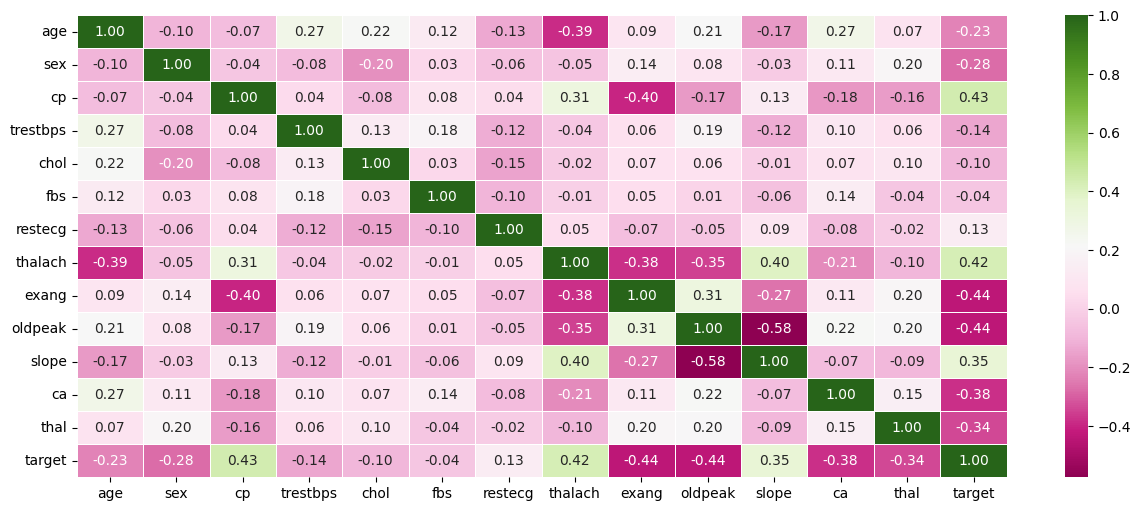

In [21]:
# make it more visual
#using seaborns heatmaps
corr_mat=df.corr()
fig,ax= plt.subplots(figsize=(15,6))
ax= sns.heatmap(corr_mat,annot=True,
               linewidths=0.5,
                fmt=".2f",
               cmap="PiYG"
               #center=1
               )#PiYG,BuPu

In [22]:
# Diagonal plot of correlation matrix (NOT NEEDED--->> JUST DID TO LEARN HOW TO PLOT)
## Know more about below code @@@@>???
# Generate a mask for the upper triangle
"""
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
"""

'\nmask = np.triu(np.ones_like(corr_mat, dtype=bool))\n\n# Set up the matplotlib figure\nf, ax = plt.subplots(figsize=(11, 9))\n\n# Generate a custom diverging colormap\ncmap = sns.diverging_palette(230, 20, as_cmap=True)\n\n# Draw the heatmap with the mask and correct aspect ratio\nsns.heatmap(corr_mat, mask=mask, cmap=cmap, vmax=.3, center=0,\n            square=True, linewidths=.5, cbar_kws={"shrink": .5})\n'

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Seperating X and Y

ie target variable and other columns based on which we will be predicitng the target variable

In [24]:
# splitting the data into X and y
X= df.drop("target",axis=1)
y=df["target"]
X
#this is how X look's like

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [25]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [26]:
# split data in to train and test sets
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [28]:
y_train,len(y_train)

(835    0
 137    1
 534    1
 495    1
 244    1
       ..
 700    1
 71     0
 106    0
 270    1
 860    0
 Name: target, Length: 820, dtype: int64,
 820)

Now we've got our data split into training and testing sets, it's time to built a ml model.

We'll train it (find the patterns) on the training sets.

and we'll test it (use the patterns) on the test sets.

##  For choosing a model look at the sklearn map (guide)

We are going to try 3 different ml models
1) Logistic Regression

2) K-nearest neighbours classifiers

3) Random Forest Classifier

In [29]:
#Creating a func and fitting each of the model inside that functions

#FOr now we are putting models in a dictionary
models = {"Logistics Regression": LogisticRegression(),
         "KNN":KNeighborsClassifier(),
          "RandomForest": RandomForestClassifier()}

#we are selecting the models this way because we do want to run the models by making functions

# NOW CREATING A FUNC()
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    fits and evaluates the given ml models
    PARAMETERS IT USES ARE(AS FOLLOW):
    models:a dic of diff sklearn ml models,
    X_train: training data (no labels)
    X_test: Testing data (no labels),
    y_train: training the data label
    y_test:testing the label data
    """

    #setting a random seed
    np.random.seed(42)

    #make a dictionary to keep a model score
    model_scores = {}

    # Loop through models
    for name, model in models.items():

    #.items() is a predefine dic function in python which returns the key/values of dic as o/p
        #name is key in the dictionary (Eg:Logistic Regression)
        # model is the value of that key (Eg: Logistic Regression() )
        # we are accessing the items of that dic with .items() func here

        # fit the model to the data
        model.fit(X_train,y_train)
        #(Eg:1) what this above step does
        ## Logistic Regression().fit(X_train,y_train)
        """ IT fits the model with train data here one by one with all models mentioned above
        """

        # Evaluate the model and append its scores to the model_scores = {}
        model_scores[name] = model.score(X_test,y_test)*100
        # model_scores is a empty dic
        #name is the key of the models dic, so what does this step does for us is:
        """
        (Eg:1): model_score[Logistic Regression] = LogisticRegression.score(X_test,y_test)
        it scores the model with test dataset and the result outcome of the model score
        it reflect that output to model_score dic

        Same goes with other models mentioned above, just to check the evalution of every models
        """
    return model_scores

In [30]:
## Fit_and_score() --->> DocString: fits and evaluates the given ml models

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores
# the warning basically tells us that our models can be changed to perform better

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistics Regression': 78.53658536585367,
 'KNN': 73.17073170731707,
 'RandomForest': 98.53658536585365}

##  Model Comparison

'\nThe Graph indicates us that knn is the model which is not suitable for the current dataset\n'

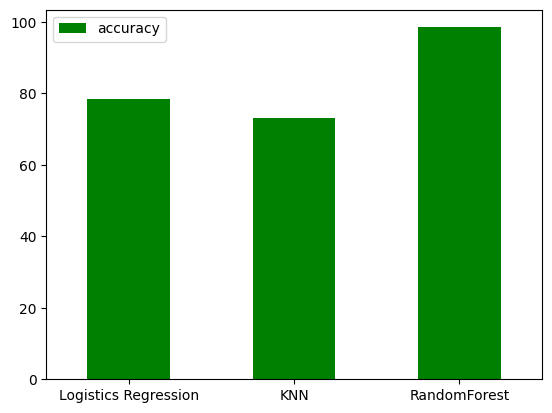

In [31]:
model_compare = pd.DataFrame(model_scores ,index=["accuracy"])
model_compare.T.plot.bar(color ="Green",rot=0) # rot=0 just to rotate the x labels on x axis
# .T. is the transpose matrix

"""
The Graph indicates us that knn is the model which is not suitable for the current dataset
"""

{<br>
'Logistics Regression':7902439024390245,<br>
'KNN': 73.17073170731707, <br>
'RandomForest': 98.53658536585365 <br>
}

In [32]:
#clearly we can see Random Forest is giving us better accuracy rate compare to others

**Now we've got a baseline model...and we know a model's first predictions are'nt always**

**what we should based our next step off. what we should do**

## WORK ON -> different parameters

**just to make the model more accurate enough :**

**Hyperparameter tuning** - Each model you use has a series of dials you can turn to dictate how they perform. Changing these values may increase or decrease model performance.

**Feature importance** - If there are a large amount of features we're using to make predictions, do some have more importance than others? For example, for predicting heart disease, which is more important, sex or age?

**Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line).

**Cross-validation** - Splits your dataset into multiple parts and train and tests your model on each part and evaluates performance as an average.

**Precision** - Proportion of true positives over total number of samples. Higher precision leads to less false positives.

**Recall** - Proportion of true positives over total number of true positives and false negatives. Higher recall leads to less false negatives.

**F1 score** - Combines precision and recall into one metric. 1 is best, 0 is worst.

**Classification report** - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

**ROC Curve** - Receiver Operating Characterisitc is a plot of true positive rate versus false positive rate.

**Area Under Curve (AUC)** - The area underneath the ROC curve. A perfect model achieves a score of 1.0.

## hyper parameters tuning (KNN)

In [33]:
# let's tune KNN
train_scores = []
test_scores =  []

# create a list of diff values for n_neighbors
"""
improving/tuning/changing: n_neighbors basically adjusting n_neighbors to make knn model better

Default value of n_neighbors =5
"""
neighbors = range(1,21) # values 1 to 20
# we r doing this because we r going to put 1by1 the values in the n_neighbors parameters then check the outcome of model

#setup knn instance
knn=KNeighborsClassifier()

# Loop through different neighbors values
"""
LOOP because we will put 1by1 all values from 1 to 20 in n_neighbors and test its output
"""
for i in neighbors:#neighboors because neighbors is mentioned above 1to20
    knn.set_params(n_neighbors = i) # set neighbors value
    ## set_params() is fun defined by sklearn to adjust parameter of each and every models


    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores
    """
    the empty list created above at top we now append/add the scores of every output
    of each values of n_neighbors to that list, just because we then can find which value is best for knn
    """
    knns = knn.score(X_train, y_train)
   # p = print(i+knns)
    train_scores.append(knns)

    # Update the test scores
    """
    the empty list created above at top we now append/add the scores of every output
    of each values of n_neighbors to that list, just because we then can find which value is best for knn
    """
    knnss = knn.score(X_test, y_test)
    #p1 = print(i+knnss)
    test_scores.append(knnss)


In [34]:
train_scores

[1.0,
 0.9963414634146341,
 0.9914634146341463,
 0.947560975609756,
 0.9231707317073171,
 0.8207317073170731,
 0.7914634146341464,
 0.7926829268292683,
 0.7670731707317073,
 0.7853658536585366,
 0.775609756097561,
 0.7695121951219512,
 0.7609756097560976,
 0.7817073170731708,
 0.7670731707317073,
 0.7670731707317073,
 0.75,
 0.7597560975609756,
 0.7634146341463415,
 0.7682926829268293]

In [35]:
test_scores

[0.9853658536585366,
 0.9560975609756097,
 0.9024390243902439,
 0.8097560975609757,
 0.7317073170731707,
 0.6878048780487804,
 0.6780487804878049,
 0.6682926829268293,
 0.7170731707317073,
 0.7170731707317073,
 0.6878048780487804,
 0.6780487804878049,
 0.6780487804878049,
 0.7170731707317073,
 0.7073170731707317,
 0.6926829268292682,
 0.6780487804878049,
 0.7073170731707317,
 0.7121951219512195,
 0.7170731707317073]

## thus from 68% knn model we improved it to 75.41%
**by just changing n_neighbors**

Max Knn scores on the test data: 98.54%


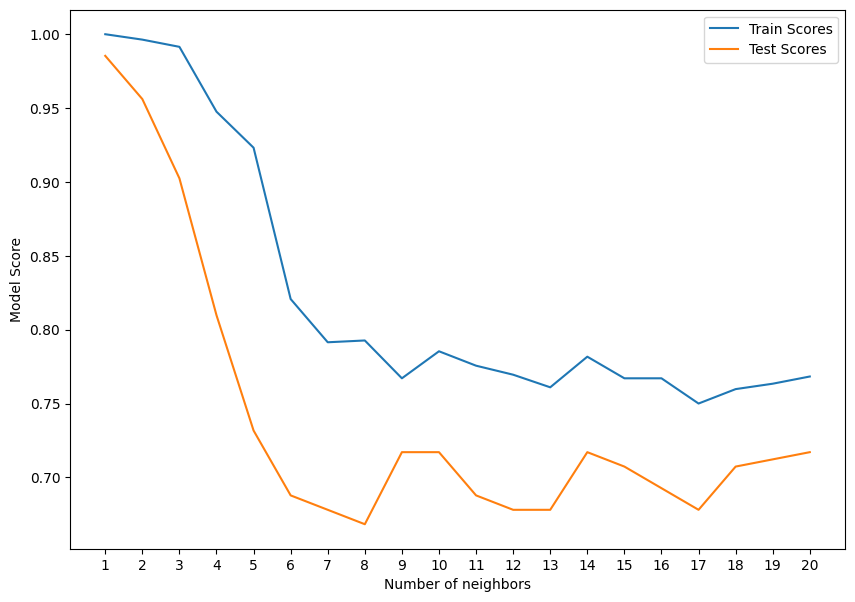

In [36]:
plt.figure(figsize=(10,7))
plt.plot(neighbors,train_scores, label="Train Scores")
plt.plot(neighbors,test_scores, label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")

plt.legend()
print(f"Max Knn scores on the test data: {max(test_scores)*100:.2f}%")
#thus by looking at the graph we can identifi that n_neighbors =1 gives out the best scores


**But still compare to other models knn o/p's is way to low For now we will leave knn model**

Tuning hyper parameters in knn with RandomizeSearchCV

In [37]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
algorithm=["auto", "ball_tree", "kd_tree", "brute"]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, algorithm=algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [38]:
#Use RandommizeSearchCV
clf = RandomizedSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 26
Best p: 2
Best n_neighbors: 3


In [39]:
best_model.score(X_test,y_test)

1.0

In [40]:
#plot_roc_curve(best_model,X_test,y_test)

In [41]:
y_preds=best_model.predict(X_test)
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0])

In [42]:
y_preds=best_model.predict(X_test)

print(confusion_matrix(y_test,y_preds))

[[102   0]
 [  0 103]]


In [43]:
#sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)

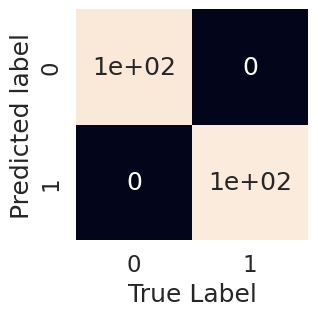

In [44]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a nice looking confusion matrix using sns heatmap

    """
    fig,ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,cbar=False
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

In [45]:
#18,1,16
#Best leaf_size: 26
#Best p: 2
#Best n_neighbors: 3
clf = KNeighborsClassifier(leaf_size=26,p=2,n_neighbors=3)

In [46]:
cv_acc_KNN=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc_KNN=np.mean(cv_acc_KNN)
cv_acc_KNN
#76.68

0.8907317073170733

In [47]:
cv_prec=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec
#78.50

0.9051111095915694

In [48]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall
#75.10

0.8802515723270441

In [49]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1
#76.7

0.8922448839317159

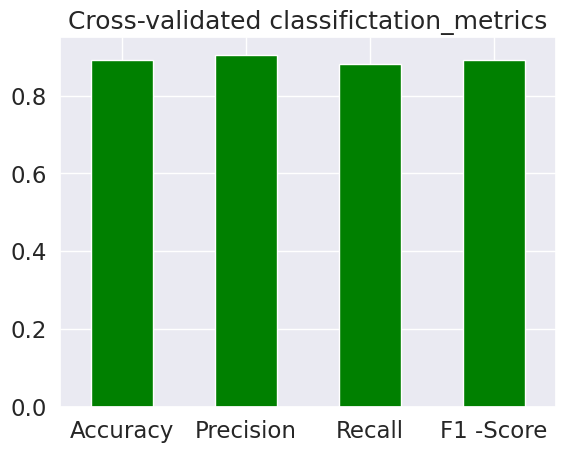

In [50]:
# visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc_KNN,
                          "Precision":cv_prec,
                           "Recall": cv_recall,
                           "F1 -Score": cv_f1
                          },index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classifictation_metrics",legend=False , rot=0,color ="Green");

Tuning More hyper parameters of KNN with gridSearchCV

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
algorithm=["auto", "ball_tree", "kd_tree", "brute"]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p,algorithm=algorithm)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
best_model.score(X_test,y_test)

In [ ]:
#plot_roc_curve(best_model,X_test,y_test)

In [ ]:
y_preds=best_model.predict(X_test)
y_preds

In [ ]:
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a nice looking confusion matrix using sns heatmap

    """
    fig,ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,cbar=False
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

In [ ]:
clf = KNeighborsClassifier(leaf_size=1,p=1,n_neighbors=7)

In [ ]:
cv_acc_KNN1=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc_KNN1

In [ ]:
cv_acc_KNN1 =np.mean(cv_acc_KNN1)
cv_acc_KNN1

In [ ]:
cv_prec=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

In [ ]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

In [ ]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

In [ ]:
# visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc_KNN1,
                          "Precision":cv_prec,
                           "Recall": cv_recall,
                           "F1 -Score": cv_f1
                          },index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classifictation_metrics",legend=False , rot=0,color ="green");

In [ ]:
"""#array([0.05282358, 0.0400168 , 0.1686947 , 0.007784  , 0.01296211,
       0.        , 0.00579679, 0.10092355, 0.12857981, 0.13222883,
       0.05526137, 0.19397585, 0.10095261])
       """

In [ ]:
"""neigh = KNeighborsClassifier()

(pd.Series(neigh.feature_importances_, index=X_test.columns)
   .nlargest(4)
   .plot(kind='barh'))"""

In [ ]:
#clf.feature_importances_

In [ ]:
"""feature_dic_knn = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dic_knn"""

In [ ]:
"""# Visualize the feature imoprtance
feature_df_1 = pd.DataFrame(feature_dic_1, index=[0])
feature_df_1.T.plot.bar(title="Feature Importance-KNN", legend=False , color = "Purple" , rot=0,figsize = (15,6));
"""

## Now we will work on Logistic Regression & RandomForestClassifier

And to make our work more easier we wil use:
    
**RandomizeSearchCV , GridSearchCv**

Just so we dont have to write huge func to test every hyper parameters

## Hyper parameter tuning for Logistic Regressions with help of RandomizedSearchCV

we're going to tune:

**Logistic regressions()**

**RandomForestclassifer()**

..using RandomizeSearchCV

We are using 2 hyper parameters now for the current case:

For Logistic Regression:

1) C - parameter

2) Solver parameter

@@@@ KNOW MORE ABOUT EVERY OTHER PARAMETER AT:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

For RandomForestclassifer:

1) n_estimators:

2) max_depth

3) min_sample_split

4) min_samples_leaf

@@@@@ KNOW MORE ABOUT THIS ALL PLUS OTHER PARAMETERS IN :

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
"""


In [ ]:
# create a hyper parameters grid for logisticRegression
log_reg_grid ={"C":np.logspace(-4,4,20,),
              "solver":["liblinear"]}

#create hyper parameter grid for Randomforestclassifier
rf_grid= {"n_estimators":np.arange(10,1000,20),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf" :np.arange(1,20,2)}

Now we have got hyperparameters grid setup for each of our models,let's tune them using RandomizedSearchCV.....

In [ ]:
#1st we will tune Logistic Regression
np.random.seed(42)

#setup Random hyperparameter search for LR
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                                cv=15,n_iter=20,
                                verbose=True)

#fit random hyper parameter search model for LR
rs_log_reg.fit(X_train,y_train)

In [ ]:
rs_log_reg.best_params_

In [ ]:
rs_log_reg.score(X_test,y_test)

Now we've tuned Logisctic Regression(), lets do same for RANDOMFORESTCLASSIFER

In [ ]:
np.random.seed(42)

#setup Random hyperparameter search for Rfc
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=rf_grid,
                                cv=5,n_iter=20,
                                verbose=True)

#fit random hyper parameter search model for RFC
rs_rf.fit(X_train,y_train)

In [ ]:
rs_rf.best_params_

In [ ]:
## looking at the above outcome it was 83% now its 86.88% so by chnaging hyper parameters we improved our RFC model
rs_rf.score(X_test,y_test)

In [ ]:
# Make predictions with tuned model
y_preds = rs_rf.predict(X_test)
y_preds

In [ ]:
# import ROC curve func from sklearn.metrics  modules
#plot ROC curve and calculate AUC metric for us
#plot_roc_curve(rs_rf, X_test,y_test);

In [ ]:
## now we are going to build a confusion metrics
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a nice looking confusion matrix using sns heatmap

    """
    fig,ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,cbar=False
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

In [ ]:
# check best hyper parameters
rs_rf.best_params_

In [ ]:
clf=RandomForestClassifier(n_estimators= 30,
 min_samples_split= 6,
 min_samples_leaf= 3,
 max_depth= 3)

In [ ]:
cv_acc_RF = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc_RF =np.mean(cv_acc_RF)
cv_acc_RF

In [ ]:
cv_recall = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall =np.mean(cv_recall)
cv_recall

In [ ]:
cv_pr = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_pr =np.mean(cv_pr)
cv_pr

In [ ]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1 =np.mean(cv_f1)
cv_f1

In [ ]:
# visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc_RF,
                          "Precision":cv_pr,
                           "Recall": cv_recall,
                           "F1 -Score": cv_f1
                          },index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classifictation_metrics",legend=False , rot=0,color ="Green");

# hyper parameter tuning using GridSearchCV
Since our logistic Regression model provide the best score so far so we will try to improve it more using GRidSearchCV

In [ ]:
# different hyperparameter for our logisticregression model
log_reg_grid={"C":np.logspace(-14,10,30),
             "solver":["newton-cg", "lbfgs", "sag", "saga","liblinear"]}

gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                        cv=5,
                        verbose=True
                       )
#Fit our grid hyper parameter search model
gs_log_reg.fit(X_train,y_train)


In [ ]:
gs_log_reg.best_params_

**Compare to RandomizeSearchCV output the result of GridSearchCV is more accurate**

In [ ]:
gs_log_reg.score(X_test,y_test) #thus the result is same as Fit_and_score() above which we did
#but RandomizeSCV is better then GRidSCV

## Evaluting our Tuned ML CLassifier, beyond accuracy
* ROC curve and AUC Curve
* Confusion matrix
* Classifier Report
* Precision
* Recall
* F1-Score

... and it would be great if cross validation was used where possible.

 to make comparision and evaluate our trained model, first we need to make predictions.

In [ ]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test

### ROC Curve and AUC Scores
What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

In our case...

        To get an appropriate example in a real-world problem, consider a diagnostic test that seeks to determine whether a person has a certain disease. A false positive in this case occurs when the person tests positive, but does not actually have the disease. A false negative, on the other hand, occurs when the person tests negative, suggesting they are healthy, when they actually do have the disease.
        (TO KNOW WHAT IS TRUE POSITIVE AND FALSE POSITIVE WE SEE CONFUSION MATRIX)
        
Scikit-Learn implements a function plot_roc_curve which can help us create a ROC curve as well as calculate the area under the curve (AUC) metric.
    (# THE PERFECT MODEL WILL GIVE US AUC CURVE OUTPUT AS : 1.0)

Reading the documentation on the plot_roc_curve function we can see it takes (estimator, X, y) as inputs. Where estiamator is a fitted machine learning model and X and y are the data you'd like to test it on.

In our case, we'll use the GridSearchCV version of our LogisticRegression estimator, gs_log_reg as well as the test data, X_test and y_test.


In [ ]:
# import ROC curve func from sklearn.metrics  modules
#plot ROC curve and calculate AUC metric for us
#plot_roc_curve(gs_log_reg, X_test,y_test);

* AUC curve of 0.93 is near to perfect curve

In [ ]:
## now we are going to build a confusion metrics
print(confusion_matrix(y_test,y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    plot a nice looking confusion matrix using sns heatmap

    """
    fig,ax= plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot=True,cbar=False
                    )
    plt.xlabel("True Label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test,y_preds)

**You can see the model gets confused (predicts the wrong label) relatively the same across both classes. In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).**

## CLassifiction Report  && cross-validated Recall, F1-score

In [ ]:
print(classification_report(y_test,y_preds))
"""
Here is the catch we have done classificition report only on X_test dataset which is not ideal.

We will make cross-validation and then do see the PRECISION , F1-SCORE, RECALL etc...
"""

## Calculate evaluation metrics using cross-validation

we're going to calculate precision, recall and f1-score of our model using cross-valiation
and to do so we will be using cross_val_score().

In [ ]:
# check best hyper parameters
gs_log_reg.best_params_

In [ ]:
#create a new classifier with best parameters
clf = LogisticRegression(C=0.17433288221999874,solver="liblinear")

**now we r getting all the cross-validated metrics
accuracy,precison,recall,f1**

In [ ]:
# Cross validate accuracy
cv_acc_LR = cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc_LR

In [ ]:
cv_acc_LR=np.mean(cv_acc_LR)
cv_acc_LR

In [ ]:
# Cross validate Recall
cv_rec = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall = np.mean(cv_rec)
cv_recall

In [ ]:
# Cross validate precision
cv_pre = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_pre)
cv_precision

In [ ]:
# Cross validate F1
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_F1 = np.mean(cv_f1)
cv_F1

In [ ]:
cv = [cv_acc_LR,cv_F1,cv_precision,cv_recall]
CV = np.mean(cv)
print("Mean of all parameters of CV  is :",+ CV*100)

In [ ]:
# visualize our cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy":cv_acc_LR,
                          "Precision":cv_precision,
                           "Recall": cv_recall,
                           "F1 -Score": cv_F1
                          },index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classifictation_metrics",legend=False , rot=0,color ="Green");

## Feature importance

Feature importance is another way of asking, "which features contributing most to the outcomes of the model?"

**REM:finding a feature importance is diff for each ML models**

Or for our problem, trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some of the other functions we've seen, because how each model finds patterns in data is slightly different, how a model judges how important those patterns are is different as well. This means for each model, there's a slightly different way of finding which features were most important.

You can usually find an example via the Scikit-Learn documentation or via searching for something like "[MODEL TYPE] feature importance", such as, "random forest feature importance".

Since we're using LogisticRegression, we'll look at one way we can calculate feature importance for it.

To do so, we'll use the coef_ attribute. Looking at the Scikit-Learn documentation for LogisticRegression, the coef_ attribute is the coefficient of the features in the decision function.

We can access the coef_ attribute after we've fit an instance of LogisticRegression.


In [ ]:

# fit an instance of Logisctic Regression

clf = LogisticRegression(C=0.17433288221999874,
                        solver="liblinear")
clf.fit(X_train,y_train);


In [ ]:
# creating Coeff
"""
During the research of feature importance of Logistic Regression we found
out that there is an attribute name coef_
@@ KNOW MORE ABOUT COEF_ ???????????????
"""
clf.coef_

In [ ]:
# MATCH  the coef of features to columns
feature_dic=dict(zip(df.columns, list(clf.coef_[0])))
feature_dic

In [ ]:
# Visualize the feature imoprtance
feature_df = pd.DataFrame(feature_dic, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False , color = "Green" , rot=0,figsize = (15,6));

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

We can see this by comparing the sex column to the target column.

In [ ]:
pd.crosstab(df["sex"], df["target"])

You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [ ]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

Looking back the data dictionary, we see slope is the "slope of the peak exercise ST segment" where:

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When you look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

What can you do with this information?

This is something you might want to talk to a subject matter expert about. They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).

Doing this has a few benefits:

    1) Finding out more - If some of the correlations and feature importances are confusing, a subject matter expert may be able to shed some light on the situation and help you figure out more.
    
    2) Redirecting efforts - If some features offer far more value than others, this may change how you collect data for different problems. See point 3.
    
    3) Less but better - Similar to above, if some features are offering far more value than others, you could reduce the number of features your model tries to find patterns in as well as improve the ones which offer the most. This could potentially lead to saving on computation, by having a model find patterns across less features, whilst still achieving the same performance levels.

## RandomForestClassifier Feature Importance

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [ ]:
clf = RandomForestClassifier(n_estimators=210,min_samples_split=4, min_samples_leaf=19,max_depth=3)
clf.fit(X_train,y_train)

In [ ]:
# above hyper parameters which we kept that we did by seeing the randomizeSearchCv

# Now we will be trying GridSearchCV and let's c what best output it gives us
rfc_reg_grid={"n_estimators":np.arange(10,500,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,10,4),
          "min_samples_leaf" :np.arange(1,10,4)}

gs_log_reg=GridSearchCV(RandomForestClassifier(),
                       param_grid=rfc_reg_grid,
                        cv=5,
                        verbose=True
                       )
#Fit our grid hyper parameter search model
gs_log_reg.fit(X_train,y_train)


In [ ]:
clf.feature_importances_

In [ ]:
feature_dic_1 = dict(zip(df.columns, list(clf.feature_importances_)))
feature_dic_1

In [ ]:
# Visualize the feature imoprtance
feature_df_1 = pd.DataFrame(feature_dic_1, index=[0])
feature_df_1.T.plot.bar(title="Feature Importance-RFC", legend=False , color = "orange" , rot=0,figsize = (15,6));

In [ ]:
cv_acc_rf= cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc_rf

In [ ]:
cv_acc_rf=np.mean(cv_acc_rf)
cv_acc_rf

In [ ]:
cv_rec = cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall_1 = np.mean(cv_rec)
cv_recall_1

In [ ]:
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1_1 = np.mean(cv_f1)
cv_f1_1

In [ ]:
cv_pre = cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_pre_1 = np.mean(cv_pre)
cv_pre_1

In [ ]:
cv_metrics_rf = pd.DataFrame({"Accuracy":cv_acc_rf,
                          "Precision":cv_pre_1,
                           "Recall": cv_recall_1,
                           "F1 -Score": cv_f1_1
                          },index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classifictation_metrics",legend=False , rot=0,color ="green");

In [ ]:
## USing gaussian Naive bayes
from sklearn.naive_bayes import GaussianNB
# splitting the data into X and y
X= df.drop("target",axis=1)
y=df["target"]
X

In [ ]:
np.random.seed(42)
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)
clf = GaussianNB()
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score
# predict the target on the train dataset
predict_train = clf.predict(X_train)
print('\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = clf.predict(X_test)
print('\nTarget on test data',predict_test)

# Accuracy Score on test dataset
accuracy_test_NB = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test_NB)

In [ ]:
accuracy_test_NB

## XGB & DEC_TREE

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV


In [ ]:
# splitting the data into X and y
X= df.drop("target",axis=1)
y=df["target"]
X


In [ ]:
# split data in to train and test sets
np.random.seed(42)

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
clf2 = XGBClassifier()
eval_set=[(X_test,y_test)] #evaluation set
clf2.fit(X_train,y_train,early_stopping_rounds=10, eval_metric = "logloss", eval_set =eval_set,verbose=True)

In [ ]:
clf2.fit(X_train,y_train)

In [ ]:
clf2.score(X_test,y_test)

In [ ]:
# predict the target on the train dataset
predict_train = clf2.predict(X_train)
print('\nTarget on train data',predict_train)

# Accuray Score on train dataset
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = clf2.predict(X_test)
print('\nTarget on test data',predict_test)

# Accuracy Score on test dataset
accuracy_test_XGB = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test_XGB)

In [ ]:
accuracy_test_XGB

In [ ]:
predict_test,len(predict_test)

In [ ]:
print(confusion_matrix(y_test,predict_test))

In [ ]:
plot_conf_mat(y_test,predict_test)

In [ ]:
eta = list(range(0,50,2)) #learning_rate
gamma = list(range(0,50,2))
max_depth = list(range(0,10))
objective= ["binary:logistic"]
eval_metric = ["error"]

hp=dict(eta=eta,gamma=gamma,objective=objective,eval_metric= eval_metric
        )
xg = XGBClassifier()
clf=RandomizedSearchCV(xg,hp,cv=10)
best_model=clf.fit(X_train,y_train)

In [ ]:
print("Best eta:",best_model.best_estimator_.get_params()['eta'])
print("Best gamma:",best_model.best_estimator_.get_params()['gamma'])
print("Best max_depth:",best_model.best_estimator_.get_params()['max_depth'])
print("Best objective:",best_model.best_estimator_.get_params()['objective'])
print("Best eval_metric:",best_model.best_estimator_.get_params()['eval_metric'])

In [ ]:
best_model=clf2.fit(X_train,y_train)
#plot_roc_curve(best_model,X_test,y_test)

In [ ]:
best_model_XGB=best_model.score(X_test,y_test)
best_model_XGB

In [ ]:
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
#plot_roc_curve(best_model,X_test,y_test)

In [ ]:
y_preds=best_model.predict(X_test)
y_preds

In [ ]:
print(confusion_matrix(y_test,y_preds))

The values which we got from the RandomizedSearch CV for XGB <br>
"<br>
Best eta: 38 <br>
Best gamma: 16 <br>
Best max_depth: None <br>
Best objective: binary:logistic <br>
Best eval_metric: error <br>
"

In [ ]:
## using hyperparameters
clf = XGBClassifier(eta=38,
                    gamma=16,
                    max_depth=None,
                    objective="binary:logistic",
                    eval_metric="error")

In [ ]:
cv_prec=cross_val_score(clf,X,y,cv=5,scoring="precision")
cv_prec=np.mean(cv_prec)
cv_prec

In [ ]:
cv_acc_XGB=cross_val_score(clf,X,y,cv=5,scoring="accuracy")
cv_acc_XGB=np.mean(cv_acc_XGB)
cv_acc_XGB

In [ ]:
cv_recall=cross_val_score(clf,X,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

In [ ]:
cv_f1=cross_val_score(clf,X,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

In [ ]:
cv_metrics_XGB = pd.DataFrame({"Accuracy":cv_acc_XGB,
                          "Precision":cv_prec,
                           "Recall": cv_recall,
                           "F1 -Score": cv_f1
                          },index=[0])

cv_metrics_XGB.T.plot.bar(title="Cross-validated classifictation_metrics",legend=False , rot=0,color ="Green");

In [ ]:
## Gridsearch
eta = list(range(0,100,2)) #learning_rate
gamma = list(range(0,100,2))
max_depth = list(range(0,11))
objective= ["binary:logistic"]
eval_metric = ["error"]

hp=dict(eta=eta,gamma=gamma,objective=objective,eval_metric= eval_metric)
xg = XGBClassifier()

In [ ]:
#clf=RandomizedSearchCV(xg,hp,cv=10)
#best_model=clf.fit(X_train,y_train)

In [ ]:
clf=GridSearchCV(xg,hp,cv=10)
best_model1=clf.fit(X_train,y_train)

In [ ]:
print("Best eta:",best_model1.best_estimator_.get_params()['eta'])
print("Best gamma:",best_model1.best_estimator_.get_params()['gamma'])
print("Best max_depth:",best_model1.best_estimator_.get_params()['max_depth'])
print("Best objective:",best_model1.best_estimator_.get_params()['objective'])
print("Best eval_metric:",best_model1.best_estimator_.get_params()['eval_metric'])

" <br>
Using GridsearchCV we are getting different values for this parameters it is as follow: <br>
eta:  <br>
gamma :  <br>
max_depth :  <br>
objective :  <br>
eval_metric:  <br>
"<br>

In [ ]:
clf = XGBClassifier(eta=2,gamma=12,max_depth=6,objective="binary:logistic",eval_metric="error")

In [ ]:
cv_prec=cross_val_score(clf,X,y,cv=10,scoring="precision")
cv_prec=np.mean(cv_prec)

cv_acc_XGB1=cross_val_score(clf,X,y,cv=10,scoring="accuracy")
cv_acc_XGB1=np.mean(cv_acc_XGB1)

cv_recall=cross_val_score(clf,X,y,cv=10,scoring="recall")
cv_recall=np.mean(cv_recall)

cv_f1=cross_val_score(clf,X,y,cv=10,scoring="f1")
cv_f1=np.mean(cv_f1)

cv_prec, cv_acc_XGB1 , cv_recall , cv_f1

In [ ]:
cv_acc_XGB1,cv_acc_XGB

## Decision Tree

In [ ]:
# 1) Decision tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf_1 = DecisionTreeClassifier()
clf_1.fit(X_train,y_train)

In [ ]:
clf_1.score(X_test,y_test)

In [ ]:
criterion=['gini', 'entropy']
max_depth=list(range(1,15,2))
#max_depth=[1,6,8,11]
min_samples_split=list(range(1,13,1))  #[1,9,11,12]
min_samples_leaf=list(range(1,15,2))#[1,3,7,9]

dec_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [ ]:
hp=dict(max_depth=max_depth,min_samples_leaf=min_samples_leaf,criterion=criterion,
        min_samples_split=min_samples_split)
dt = DecisionTreeClassifier()
clf_1=RandomizedSearchCV(dt,hp,cv=10)


In [ ]:
clf_1.fit(X_train,y_train)

In [ ]:
clf_1.best_params_
#grid.best_params_

In [ ]:
clf_1 = DecisionTreeClassifier(criterion = "gini",
                               max_depth=11,
                               min_samples_leaf=7,
                               min_samples_split=9)

In [ ]:
cv_prec=cross_val_score(clf_1,X,y,cv=10,scoring="precision")
cv_prec=np.mean(cv_prec)

cv_acc_DEC=cross_val_score(clf_1,X,y,cv=10,scoring="accuracy")
cv_acc_DEC=np.mean(cv_acc_DEC)

cv_recall=cross_val_score(clf_1,X,y,cv=10,scoring="recall")
cv_recall=np.mean(cv_recall)

cv_f1=cross_val_score(clf_1,X,y,cv=10,scoring="f1")
cv_f1=np.mean(cv_f1)


cv_prec, cv_acc_DEC , cv_recall , cv_f1

In [ ]:
cv_acc_DEC

In [ ]:
# getting y_pred
#predict_test_DT = clf_1.predict(X_test)
#print('\nTarget on test data',predict_test_DT)

In [ ]:
#predict_test_DT,len(predict_test_DT)

In [ ]:
#plot_conf_mat(y_test,predict_test_DT)

In [ ]:
## Gridsearch
criterion=['gini', 'entropy']
max_depth=[1,6,8,11]
min_samples_split=[1,9,11,12]
min_samples_leaf=[1,3,7,9]
param_grid={'max_depth':max_depth,
            'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'criterion':criterion}

In [ ]:
param=dict(criterion='criterion',max_depth='max_depth',
           min_samples_split='min_samples_split',min_samples_leaf='min_samples_leaf')

In [ ]:
grid=GridSearchCV(DecisionTreeClassifier(),param_grid,n_jobs=-1,cv=3,verbose=200)
grid.fit(X_train,y_train)

In [ ]:
#best parameters that achieves higher score
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
clf_11 = DecisionTreeClassifier(criterion = "entropy",
                               max_depth=6,
                               min_samples_leaf=7,
                               min_samples_split=11)

In [ ]:
cv_prec1=cross_val_score(clf_11,X,y,cv=10,scoring="precision")
cv_prec1=np.mean(cv_prec1)

cv_acc_DEC1=cross_val_score(clf_11,X,y,cv=10,scoring="accuracy")
cv_acc_DEC1=np.mean(cv_acc_DEC1)

cv_recall1=cross_val_score(clf_11,X,y,cv=10,scoring="recall")
cv_recall1=np.mean(cv_recall1)

cv_f11=cross_val_score(clf_11,X,y,cv=10,scoring="f1")
cv_f11=np.mean(cv_f11)

cv_prec1, cv_acc_DEC1 , cv_recall1 , cv_f11

In [ ]:
cv_acc_DEC,cv_acc_DEC1

In [ ]:
best_model=clf_11.fit(X_train,y_train)
#plot_roc_curve(best_model,X_test,y_test)

In [ ]:
cv_prec, cv_acc_DEC1 , cv_recall , cv_f1
cv_metrics_XGB = pd.DataFrame({"Accuracy":cv_acc_DEC,
                          "Precision":cv_prec,
                           "Recall": cv_recall,
                           "F1 -Score": cv_f1
                          },index=[0])

cv_metrics_XGB.T.plot.bar(title="Cross-validated classifictation_metrics",legend=False , rot=0,color ="Green");

## Accuracy

In [ ]:
cv_acc_rf,cv_acc_RF

In [ ]:
cv_acc_LR,cv_acc_KNN

In [ ]:
cv_acc_DEC,cv_acc_DEC1

In [ ]:
cv_acc_XGB1,cv_acc_DEC,cv_acc_XGB

In [ ]:
acc=pd.DataFrame({"Random_forest_classifier":cv_acc_RF,
                  "Logistic Regression" :cv_acc_LR,
                  "Decision_tree":cv_acc_DEC,
                  "XGB Classifier":cv_acc_XGB,
                  "Gaussian Naive Bayes":accuracy_test_NB,
                  "KNN":cv_acc_KNN,
                 },index=[0])

In [ ]:
acc

In [ ]:
acc.T.plot.barh(title="Accuracy of all model",legend=False );

In [ ]:
acc.T.plot.pie(title="Accuracy of all model",legend=False , rot=0 ,subplots=True);